In [1]:
# 2019년 9월 BC 카드 분석본  

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/BC_Card_edit.csv")
print(df.info())
df.head()
# 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB
None


,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
print(df[df['고객소재지_광역시도'] == '서울특별시'].shape[0])
df = df[df['고객소재지_광역시도'] == '서울특별시']
df['기준년월'].value_counts()

306122


202003    79895
202103    75513
201909    64531
202009    46072
201903    40111
Name: 기준년월, dtype: int64

In [5]:
df_1909 = df[df['기준년월'] == 201909]
print(len(df_1909))

64531


In [6]:
df_1909.head(10)

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
66588,201909,16,식품,1612,음료,여성,20대,신혼영유아가구,서울특별시,강동구,길동,401631,9
66590,201909,11,패션잡화,1112,가방,여성,30대,신혼영유아가구,서울특별시,광진구,능동,1688549,17
66591,201909,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,광진구,능동,2128596,19
66592,201909,16,식품,1612,음료,여성,30대,1인가구,서울특별시,광진구,능동,95919,5
66598,201909,11,패션잡화,1112,가방,여성,40대,신혼영유아가구,서울특별시,양천구,목동,2621338,12
66599,201909,15,전자,1510,가전,여성,40대,신혼영유아가구,서울특별시,양천구,목동,955559,14
66600,201909,11,패션잡화,1110,양말,여성,50대,성인자녀가구,서울특별시,양천구,목동,234707,7
66604,201909,20,여가/스포츠,2011,레저,남성,30대,신혼영유아가구,서울특별시,중랑구,묵동,699976,9
66605,201909,20,여가/스포츠,2012,문화,여성,20대,1인가구,서울특별시,중랑구,묵동,6620798,53
66606,201909,11,패션잡화,1111,신발,여성,50대,성인자녀가구,서울특별시,중랑구,묵동,772965,17


In [7]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) 
mpl.rc('font', family='NanumBarunGothic') 

여성    40940
남성    23591
Name: 성별, dtype: int64


<AxesSubplot:>

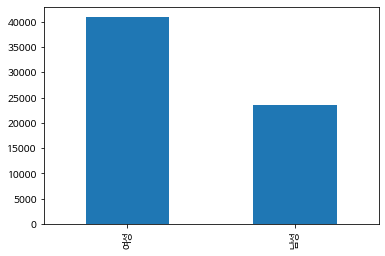

In [8]:
print(df_1909['성별'].value_counts())
df_1909['성별'].value_counts().plot.bar()

6 개
['50대', '20대', '60대 이상', '40대', '30대', '20세 미만']
30대       19556
40대       18824
20대       14163
50대        7929
60대 이상     3056
20세 미만     1003
Name: 연령, dtype: int64


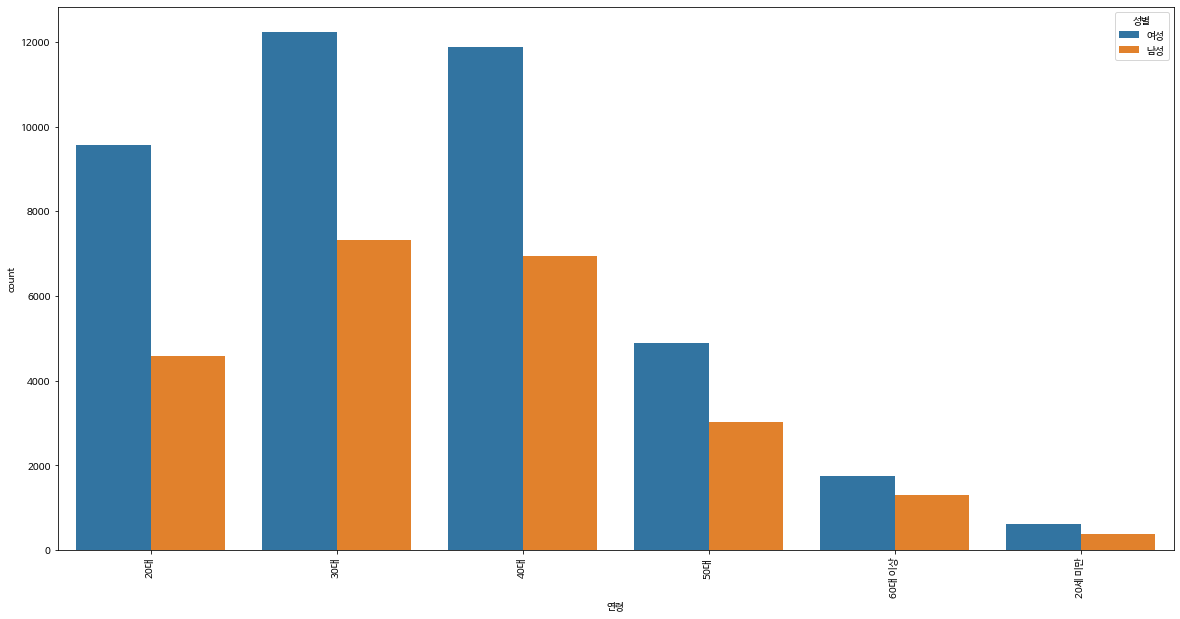

여성 연령 분포 및 순위
30대       12224
40대       11884
20대        9568
50대        4902
60대 이상     1746
20세 미만      616
Name: 연령, dtype: int64
30대       1.0
40대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64
남성 연령 분포 및 순위
30대       7332
40대       6940
20대       4595
50대       3027
60대 이상    1310
20세 미만     387
Name: 연령, dtype: int64
30대       1.0
40대       2.0
20대       3.0
50대       4.0
60대 이상    5.0
20세 미만    6.0
Name: 연령, dtype: float64


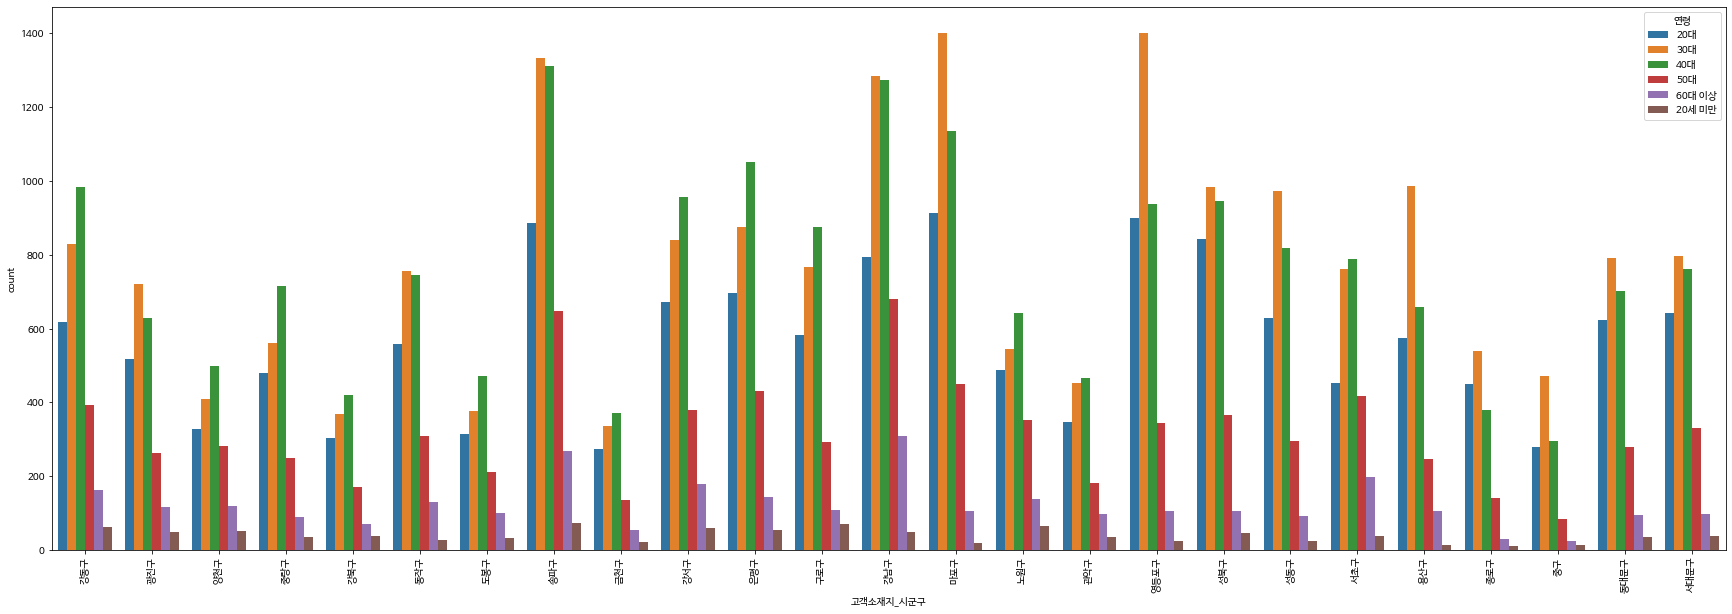

In [9]:
age = list(set(df_1909['연령']))
print(len(age),'개')
print(age)

# 총 연령 분포
print(df_1909['연령'].value_counts())

plt.figure(figsize=(20,10))
sns.countplot(x='연령', hue = '성별', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

df_1909_female =df_1909[df_1909['성별'] == '여성']
print('여성 연령 분포 및 순위')
print(df_1909_female['연령'].value_counts())
print(df_1909_female['연령'].value_counts().rank(ascending = False))

df_1909_male =df_1909[df_1909['성별'] == '남성']
print('남성 연령 분포 및 순위')
print(df_1909_male['연령'].value_counts())
print(df_1909_male['연령'].value_counts().rank(ascending = False))


plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '연령', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

25 개
['송파구', '서대문구', '강남구', '동작구', '강서구', '성북구', '관악구', '성동구', '영등포구', '동대문구', '양천구', '마포구', '종로구', '강동구', '노원구', '광진구', '금천구', '용산구', '중랑구', '구로구', '서초구', '강북구', '도봉구', '은평구', '중구']
송파구     4517
강남구     4389
마포구     4023
영등포구    3714
성북구     3288
은평구     3252
강서구     3087
강동구     3047
성동구     2836
구로구     2695
서대문구    2670
서초구     2658
용산구     2584
동작구     2526
동대문구    2525
광진구     2294
노원구     2233
중랑구     2132
양천구     1689
관악구     1581
종로구     1549
도봉구     1508
강북구     1371
금천구     1191
중구      1172
Name: 고객소재지_시군구, dtype: int64


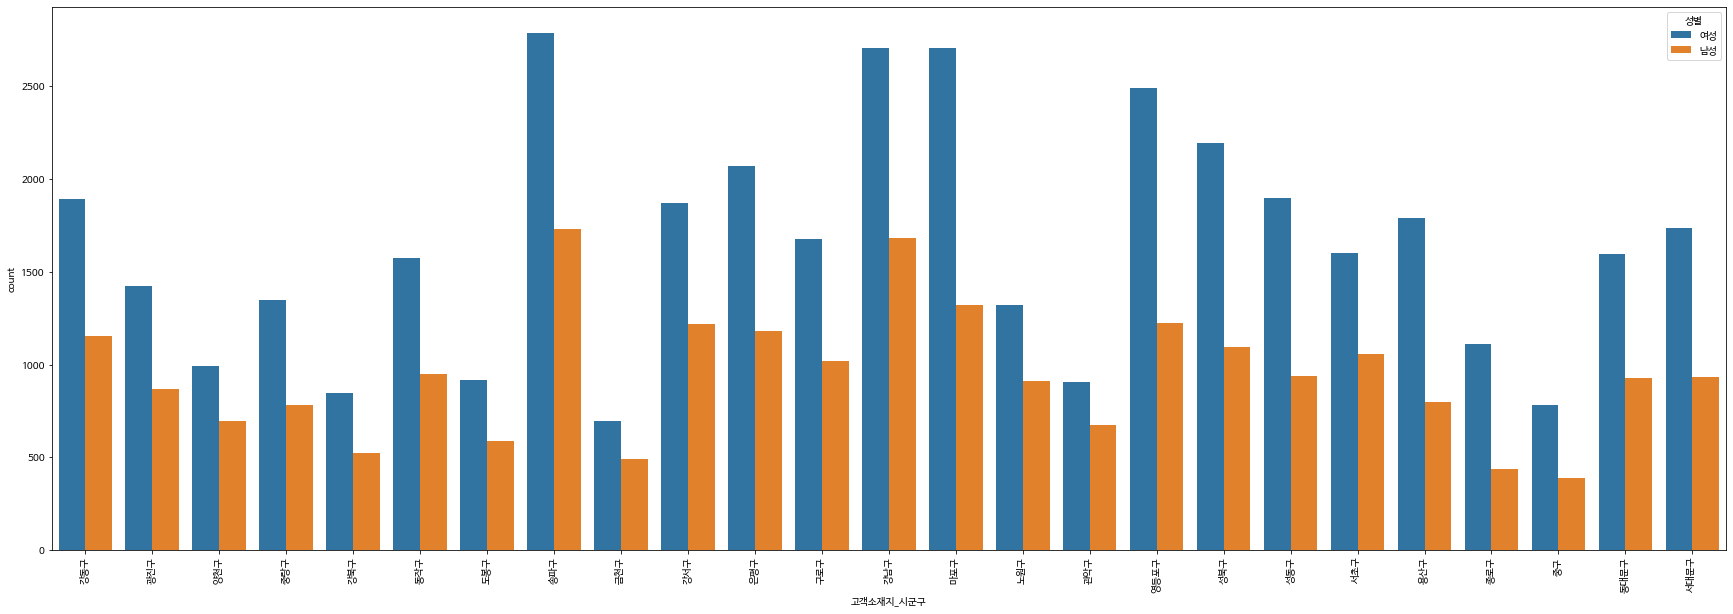

송파구     1.0
강남구     2.0
마포구     3.0
영등포구    4.0
성북구     5.0
Name: 고객소재지_시군구, dtype: float64
송파구     1.0
강남구     2.0
마포구     3.0
영등포구    4.0
강서구     5.0
Name: 고객소재지_시군구, dtype: float64


In [10]:
sigoongu = list(set(df_1909['고객소재지_시군구']))
print(len(sigoongu),'개')
print(sigoongu)

print(df_1909['고객소재지_시군구'].value_counts()) 

plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '성별', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

print(df_1909_female['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))
print(df_1909_male['고객소재지_시군구'].value_counts().rank(ascending = False).head(5))

5 개
['신혼영유아가구', '1인가구', '초중고자녀가구', '노인가구', '성인자녀가구']
신혼영유아가구    23051
1인가구       17269
초중고자녀가구    11881
성인자녀가구      9274
노인가구        3056
Name: 가구생애주기, dtype: int64


<AxesSubplot:>

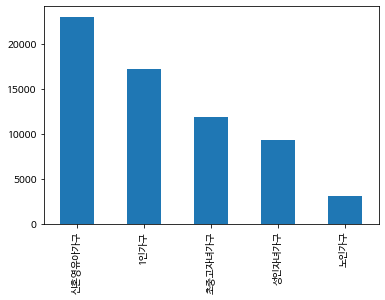

In [11]:
family = list(set(df_1909['가구생애주기']))
print(len(family),'개')
print(family)

print(df_1909['가구생애주기'].value_counts())
df_1909['가구생애주기'].value_counts().plot.bar()

In [12]:
# 각 지역구가 맞는지 판별하기 위한 True/False
iscounty = []
for i in range(len(sigoongu)):
    iscounty.append(df['고객소재지_시군구'] == sigoongu[i])
    
# 각 지역구의 데이터프레임
counties = []
for j in range(len(sigoongu)):
    counties.append(df[iscounty[j]])

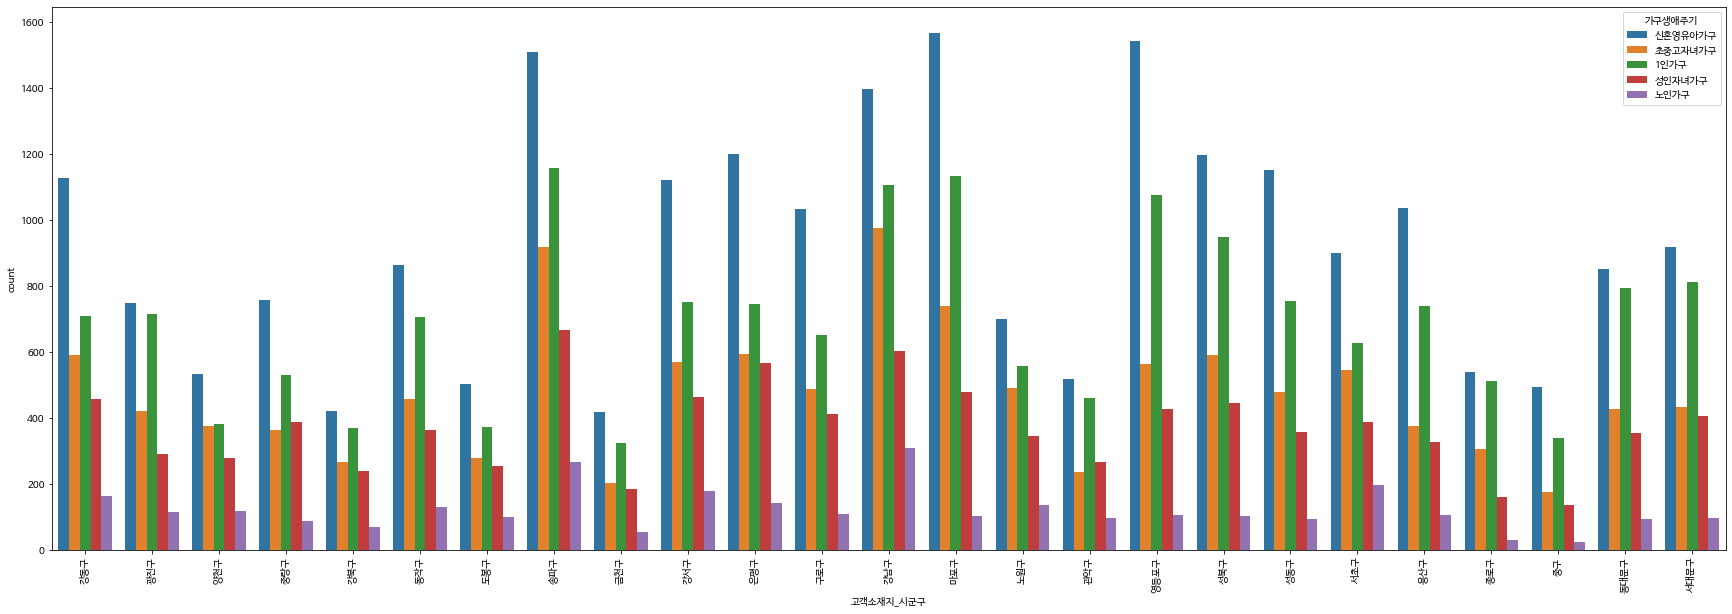

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(x='고객소재지_시군구', hue = '가구생애주기', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

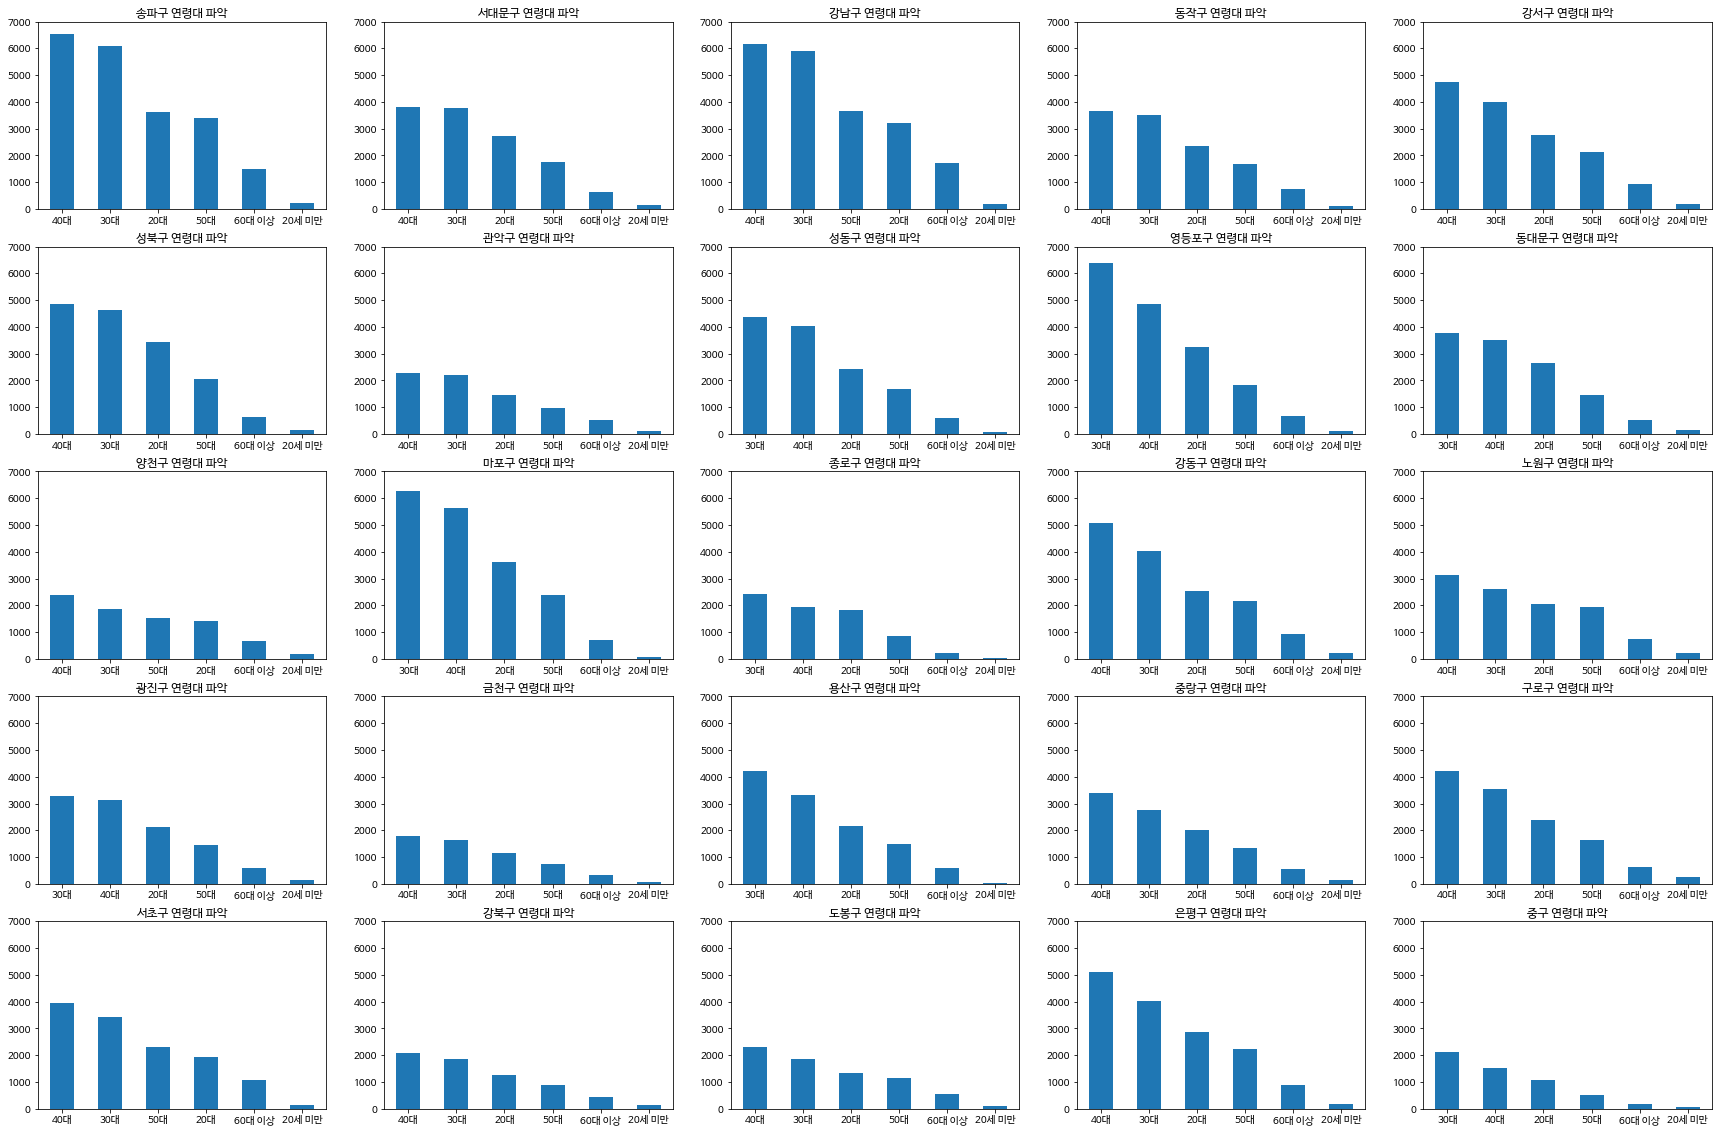

In [14]:
plt.figure(figsize=(30,20))

for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    counties[i]['연령'].value_counts().plot.bar()
    plt.ylim([0, 7000])
    plt.xticks(rotation=0)
    plt.title(sigoongu[i]+ ' 연령대 파악')

plt.show()

In [15]:
large_category = list(set(df_1909['품목대분류명']))
# print(large_category)

middle_category = list(set(df_1909['품목중분류명']))
# print(middle_category)

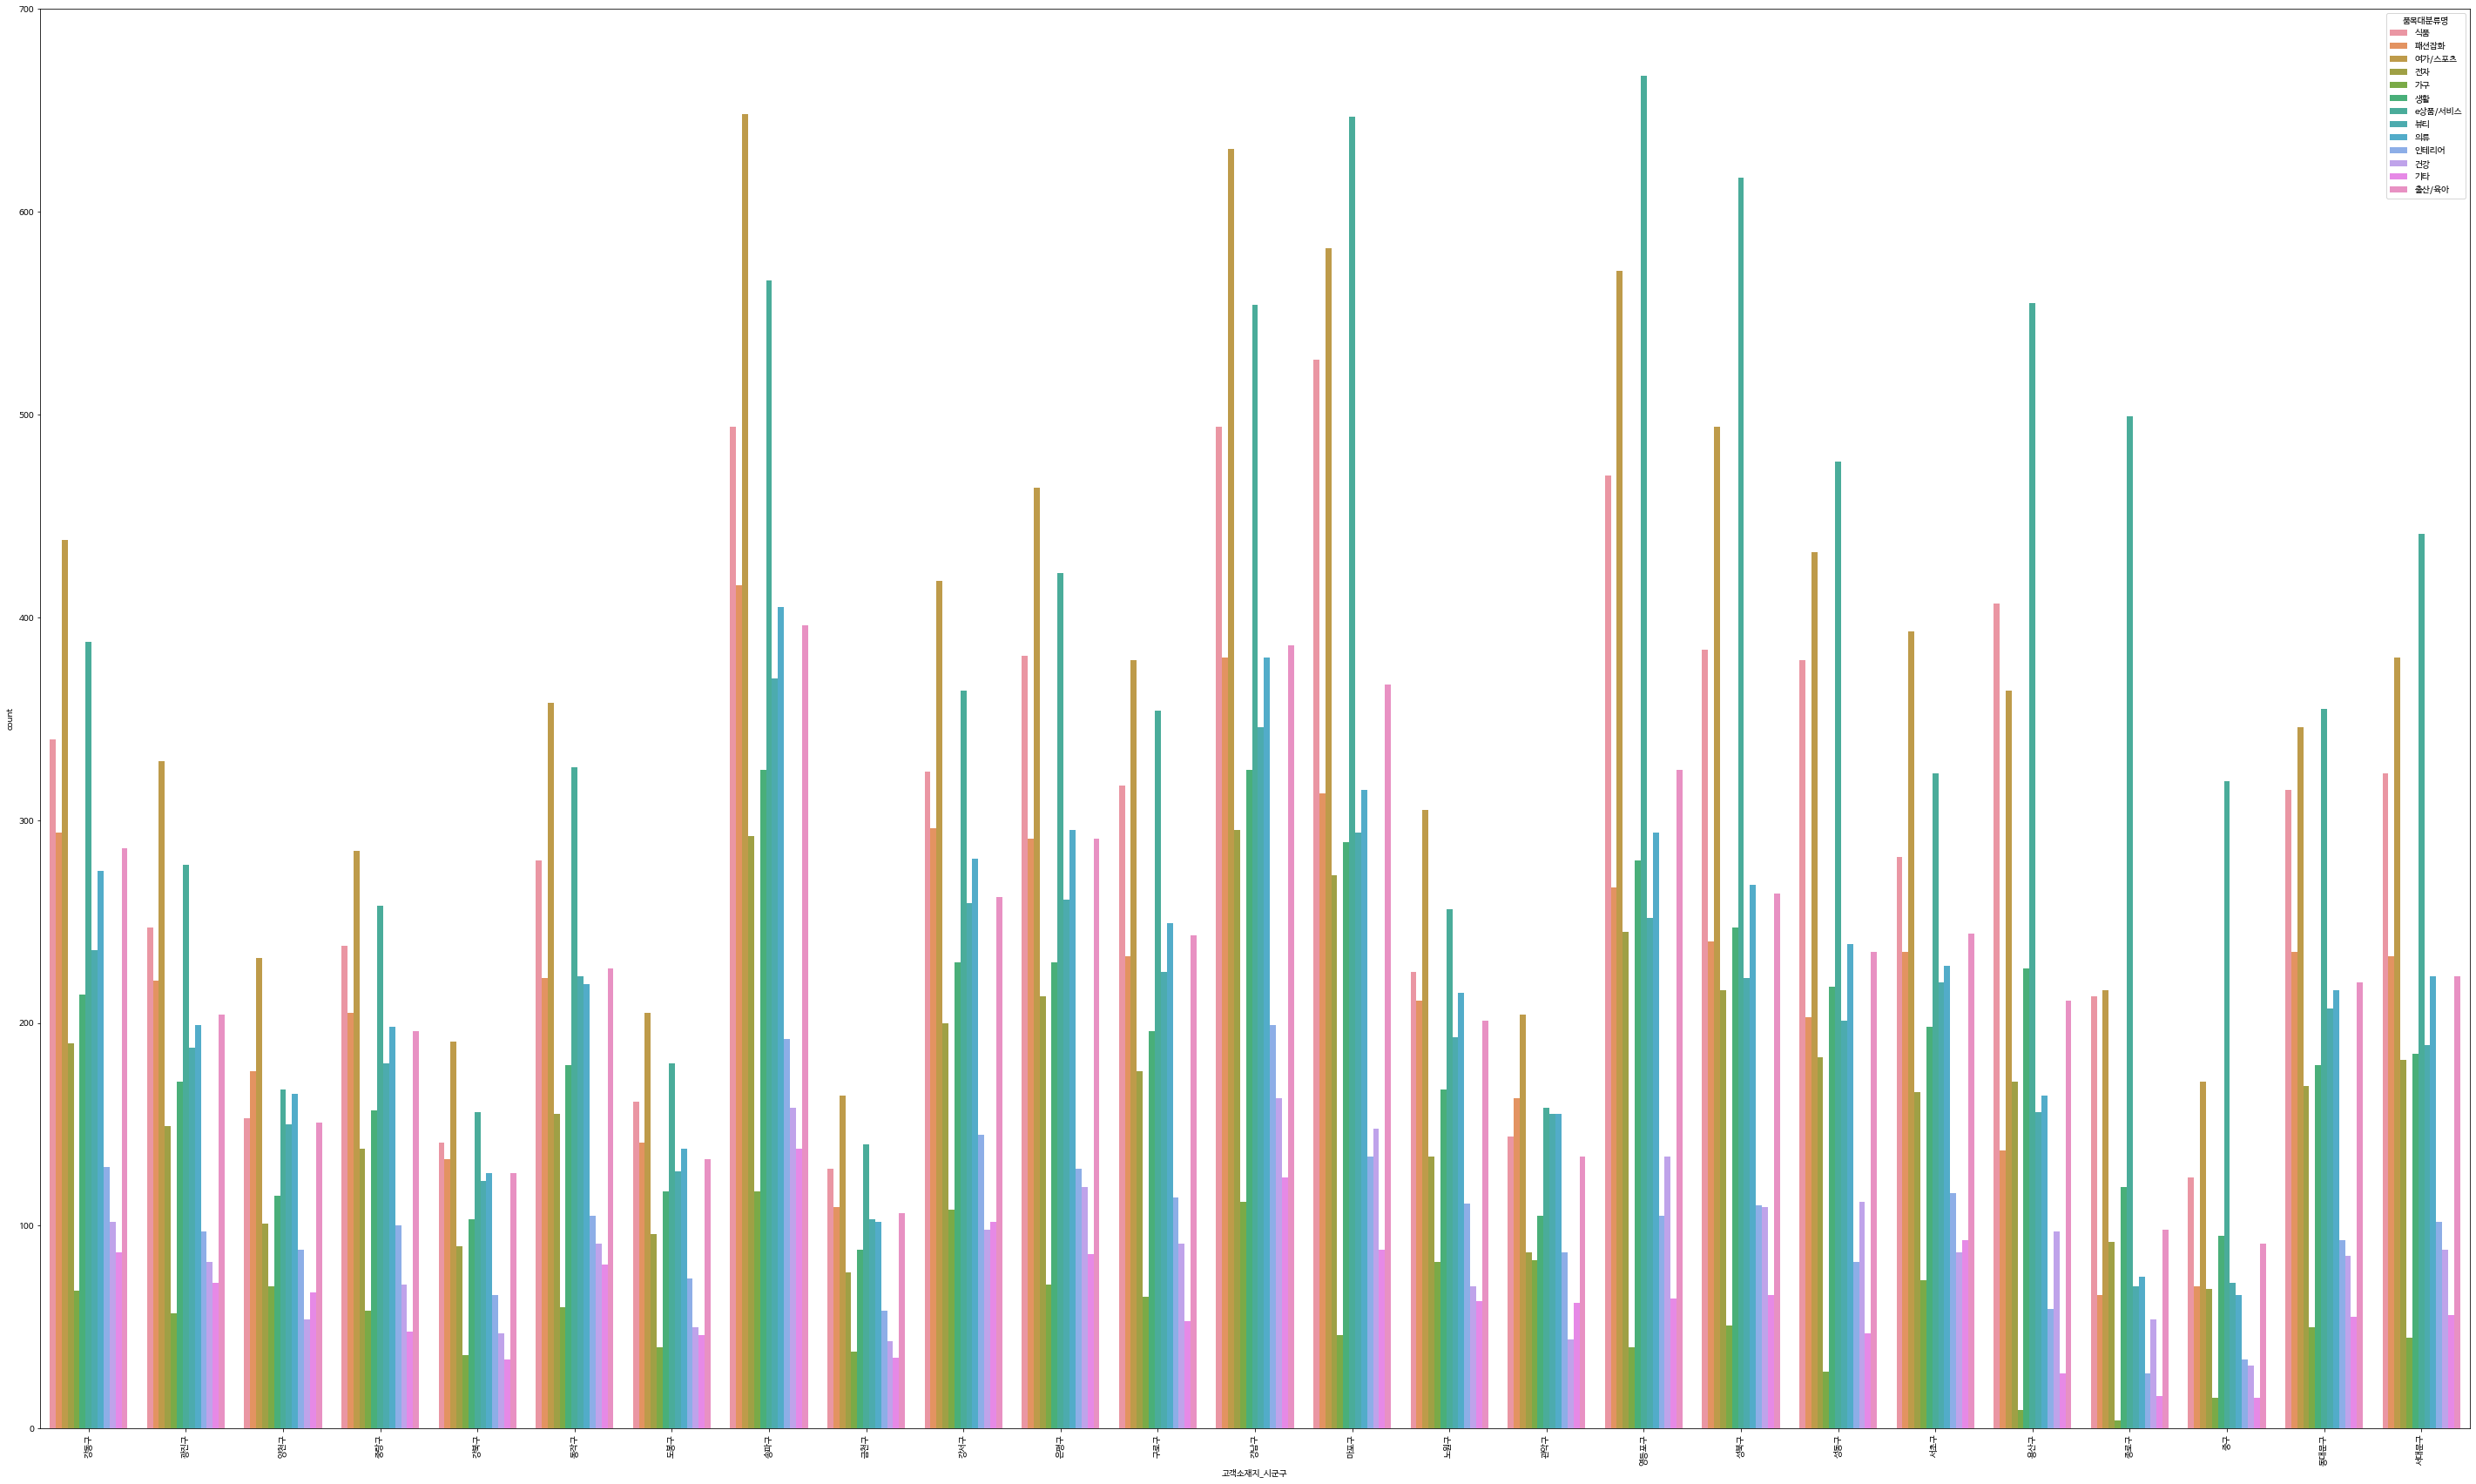

In [16]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목대분류명', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

# 여기 부분도 변경 예정
# 각 시군구 별로 매출금액 - 대품목별, 중품목별 매출건수 - 대품목별, 중폼목별
# 총 4개의 그래프 추가 예정

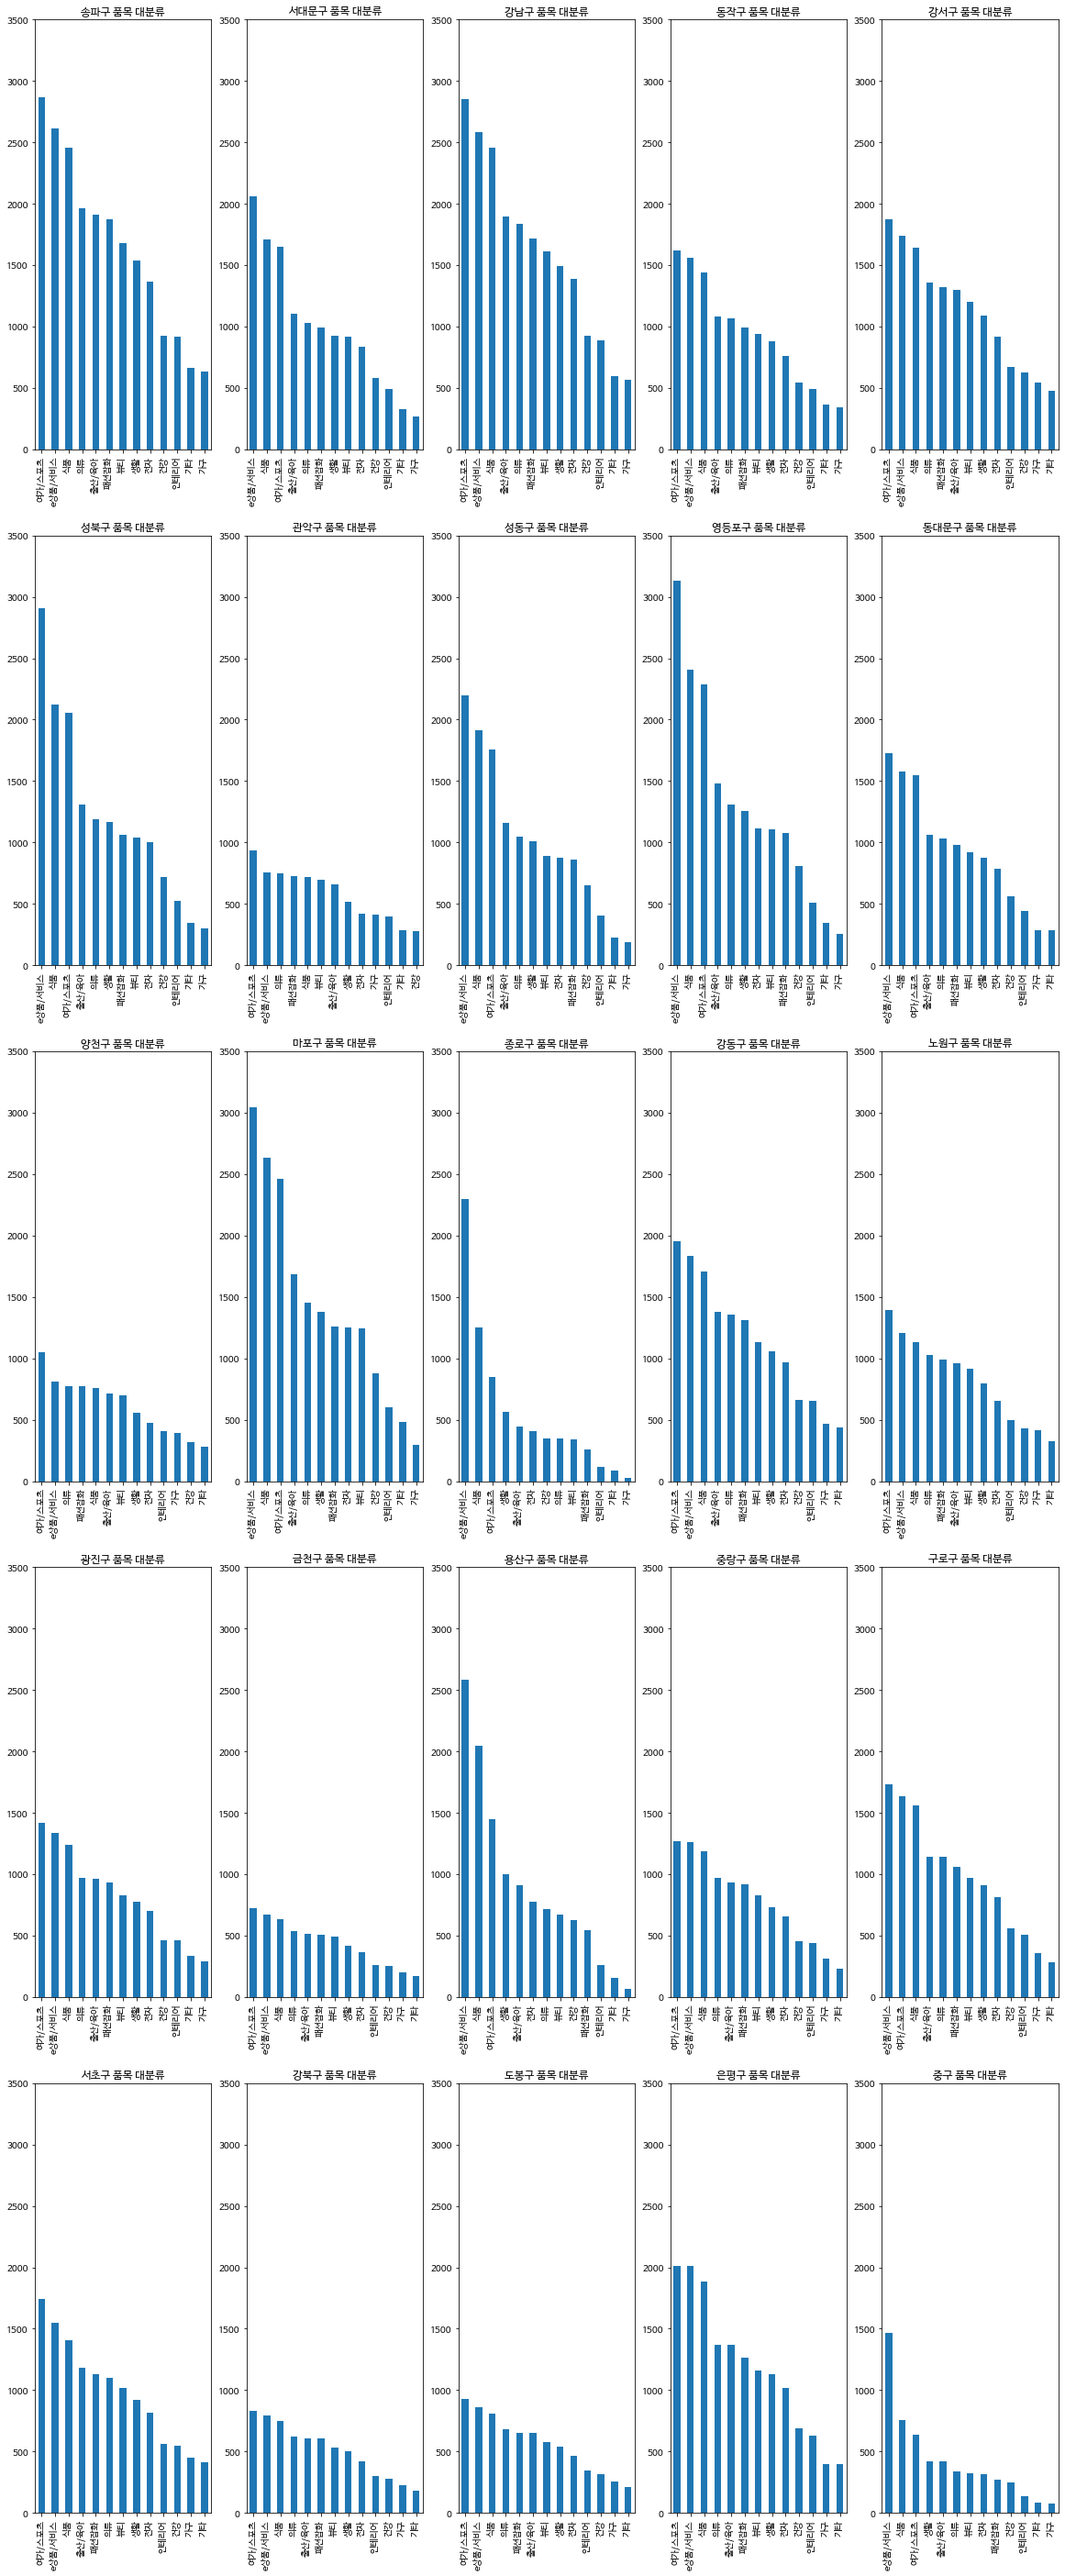

In [17]:
# 지역별 대분류 주문 회수
plt.figure(figsize=(20,50))

for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 3500])
    counties[i]['품목대분류명'].value_counts().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류')

plt.show()

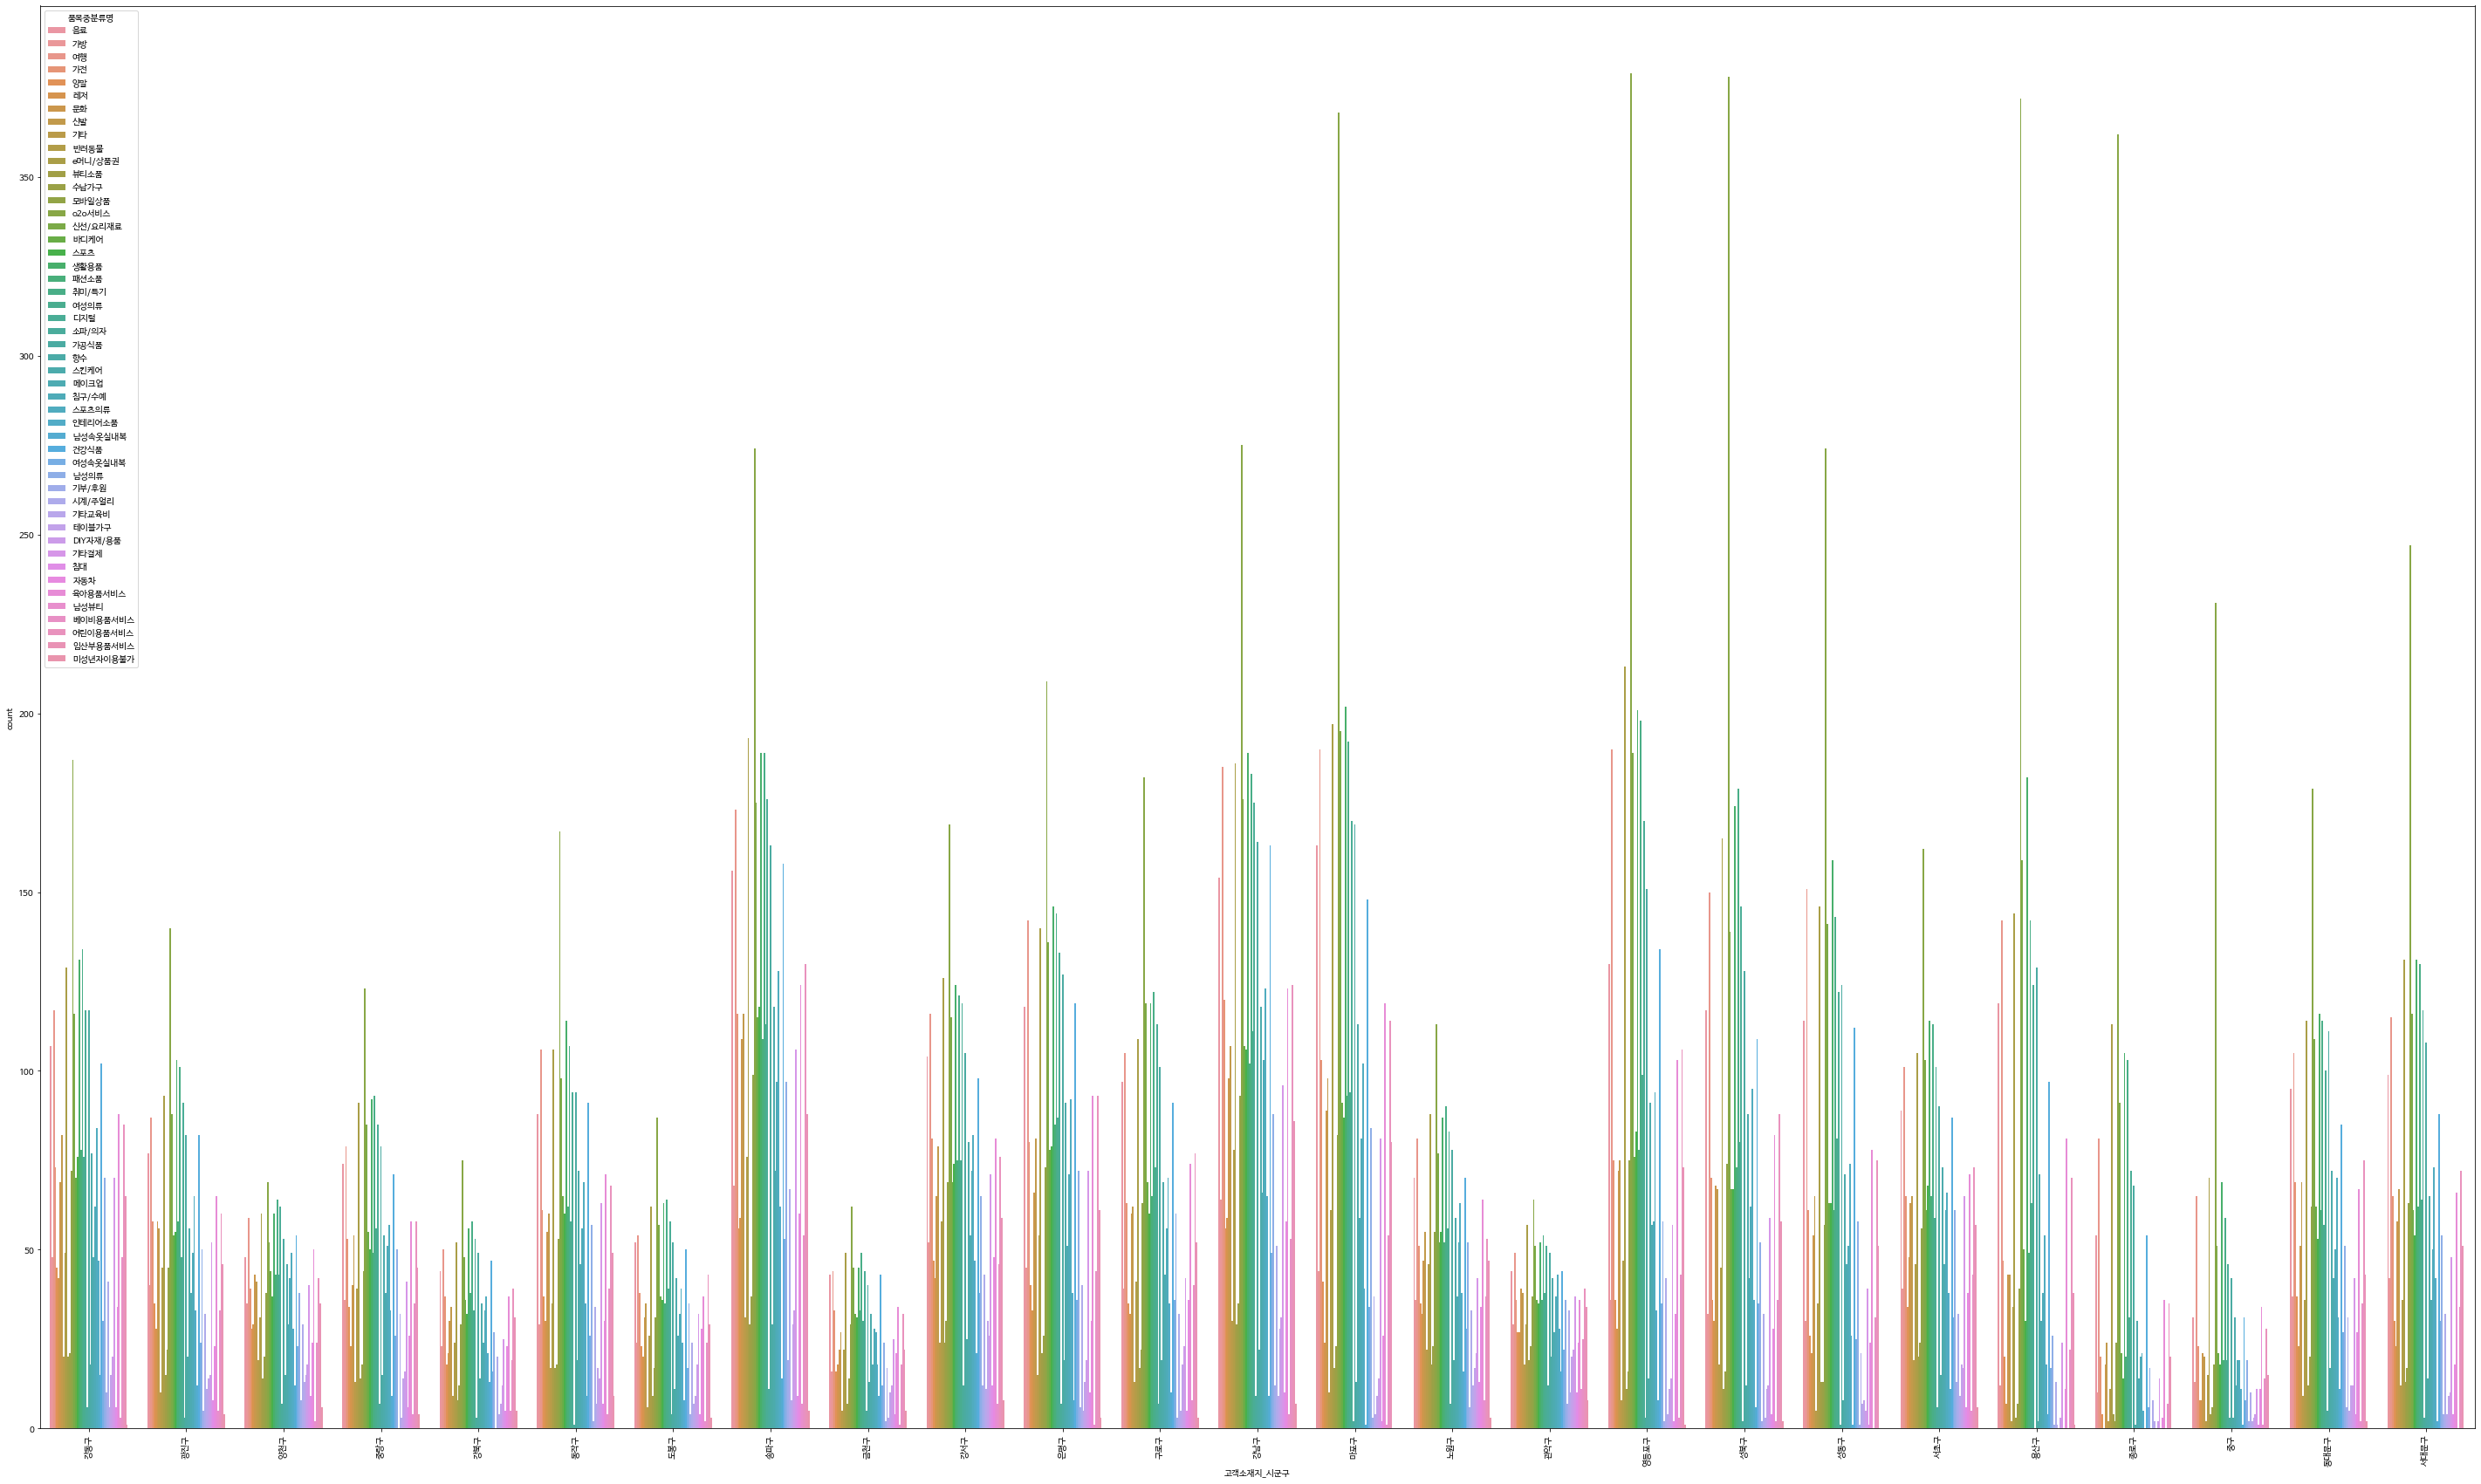

In [18]:
plt.figure(figsize=(50,30))
sns.countplot(x='고객소재지_시군구', hue = '품목중분류명', data = df_1909)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# 지역별 중분류 주문 회수
plt.figure(figsize=(200,150))

for i in range(len(sigoongu)):
    
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 2000])
    counties[i]['품목중분류명'].value_counts().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류')

plt.show()

고객소재지_시군구
강남구     10114690441
강동구      5618273069
강북구      2909955309
강서구      7413049439
관악구      6568404745
광진구      4591083978
구로구      4820411860
금천구      2672722434
노원구      5724657085
도봉구      3057663546
동대문구     4085825241
동작구      4890817941
마포구      5653851944
서대문구     4459953391
서초구      6974822601
성동구      3725953271
성북구      4472249193
송파구      9709157911
양천구      5682714788
영등포구     4954940686
용산구      2900502967
은평구      5148492800
종로구      1378667903
중구       1644460388
중랑구      3979619876
Name: 매출금액, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

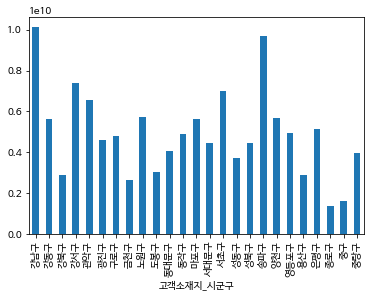

In [20]:
df_1909_매출금액합 = df_1909.groupby('고객소재지_시군구')['매출금액'].sum()
print(df_1909_매출금액합)
df_1909_매출금액합.plot.bar()

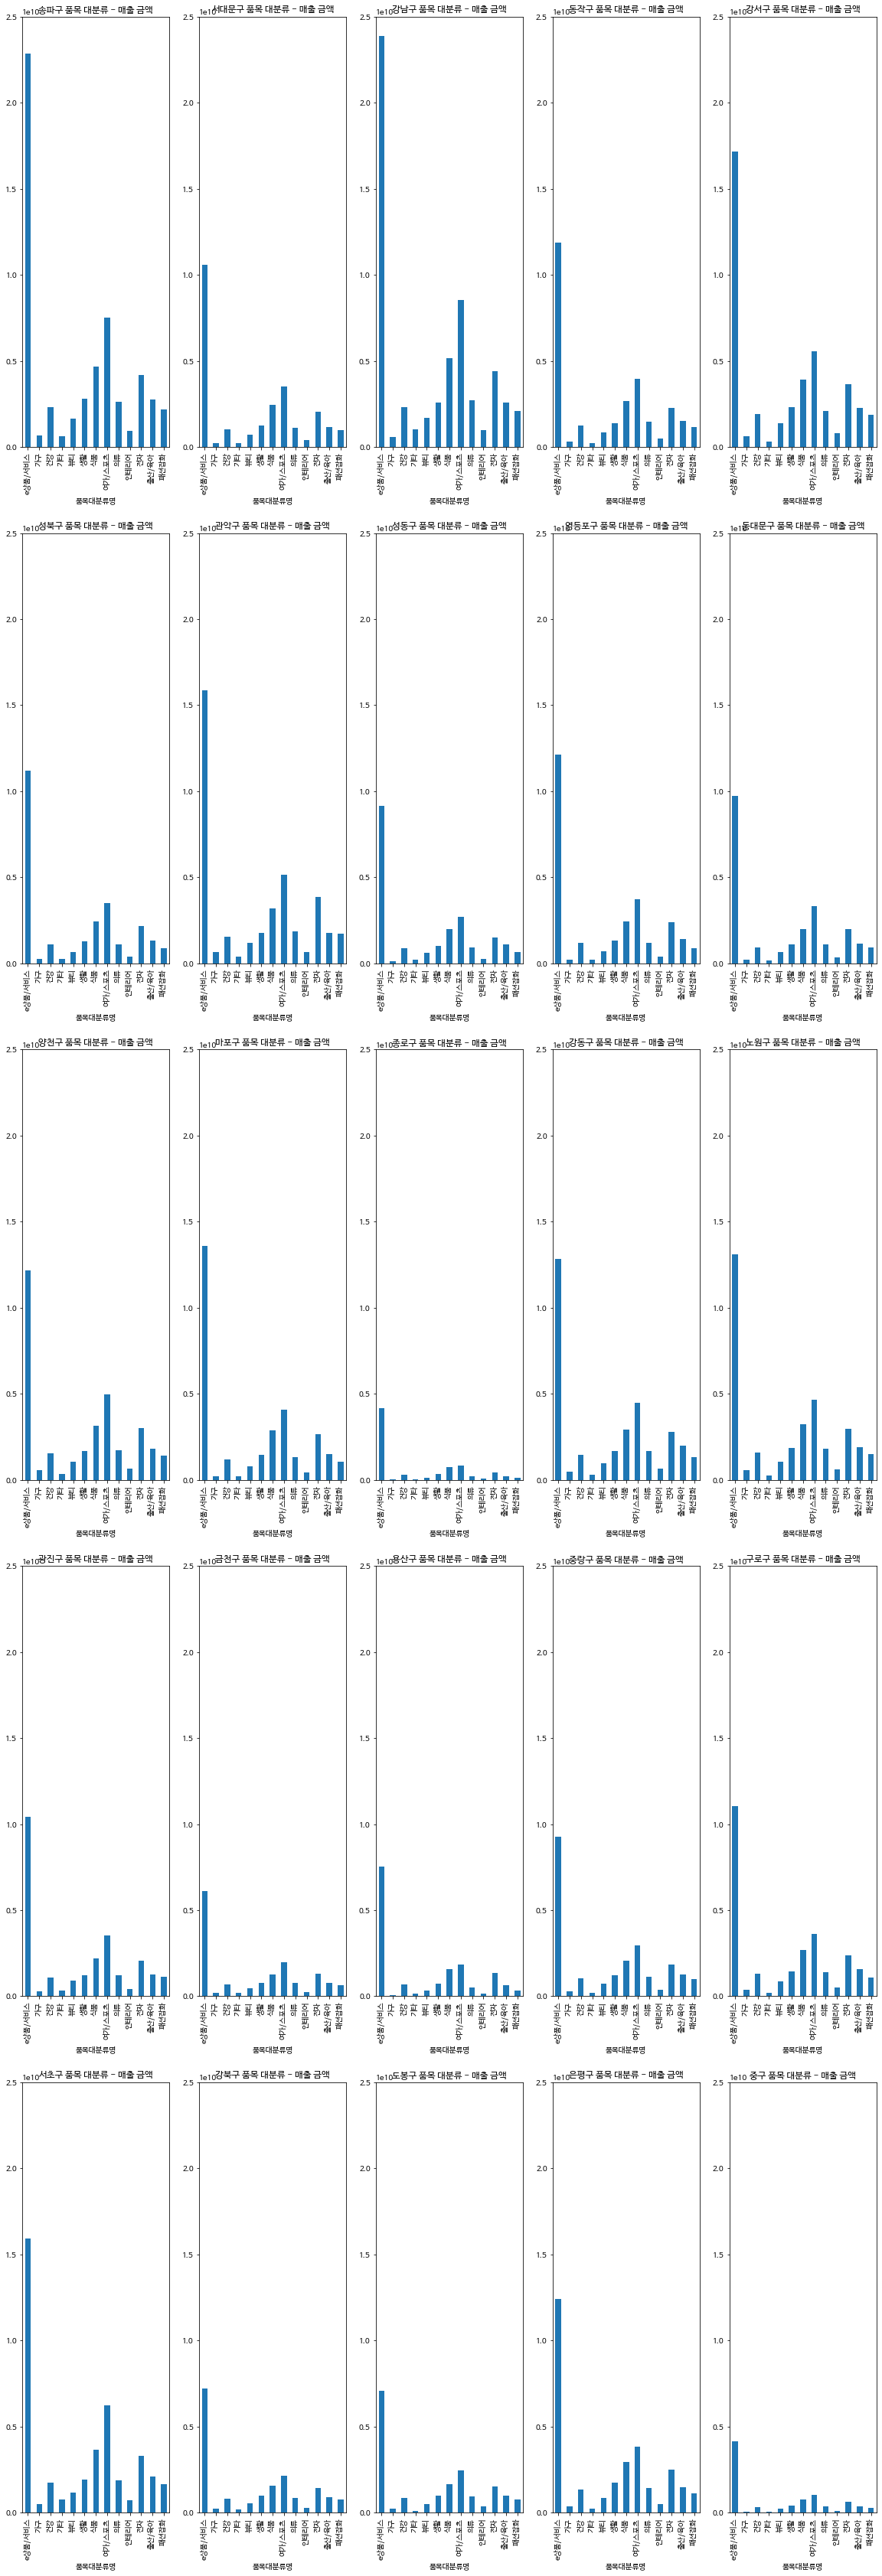

In [21]:
# 지역별 대품목 분류 - 매출 금액

plt.figure(figsize=(20,60))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 25000000000])
    counties[i].groupby('품목대분류명')['매출금액'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류 - 매출 금액')

plt.show()

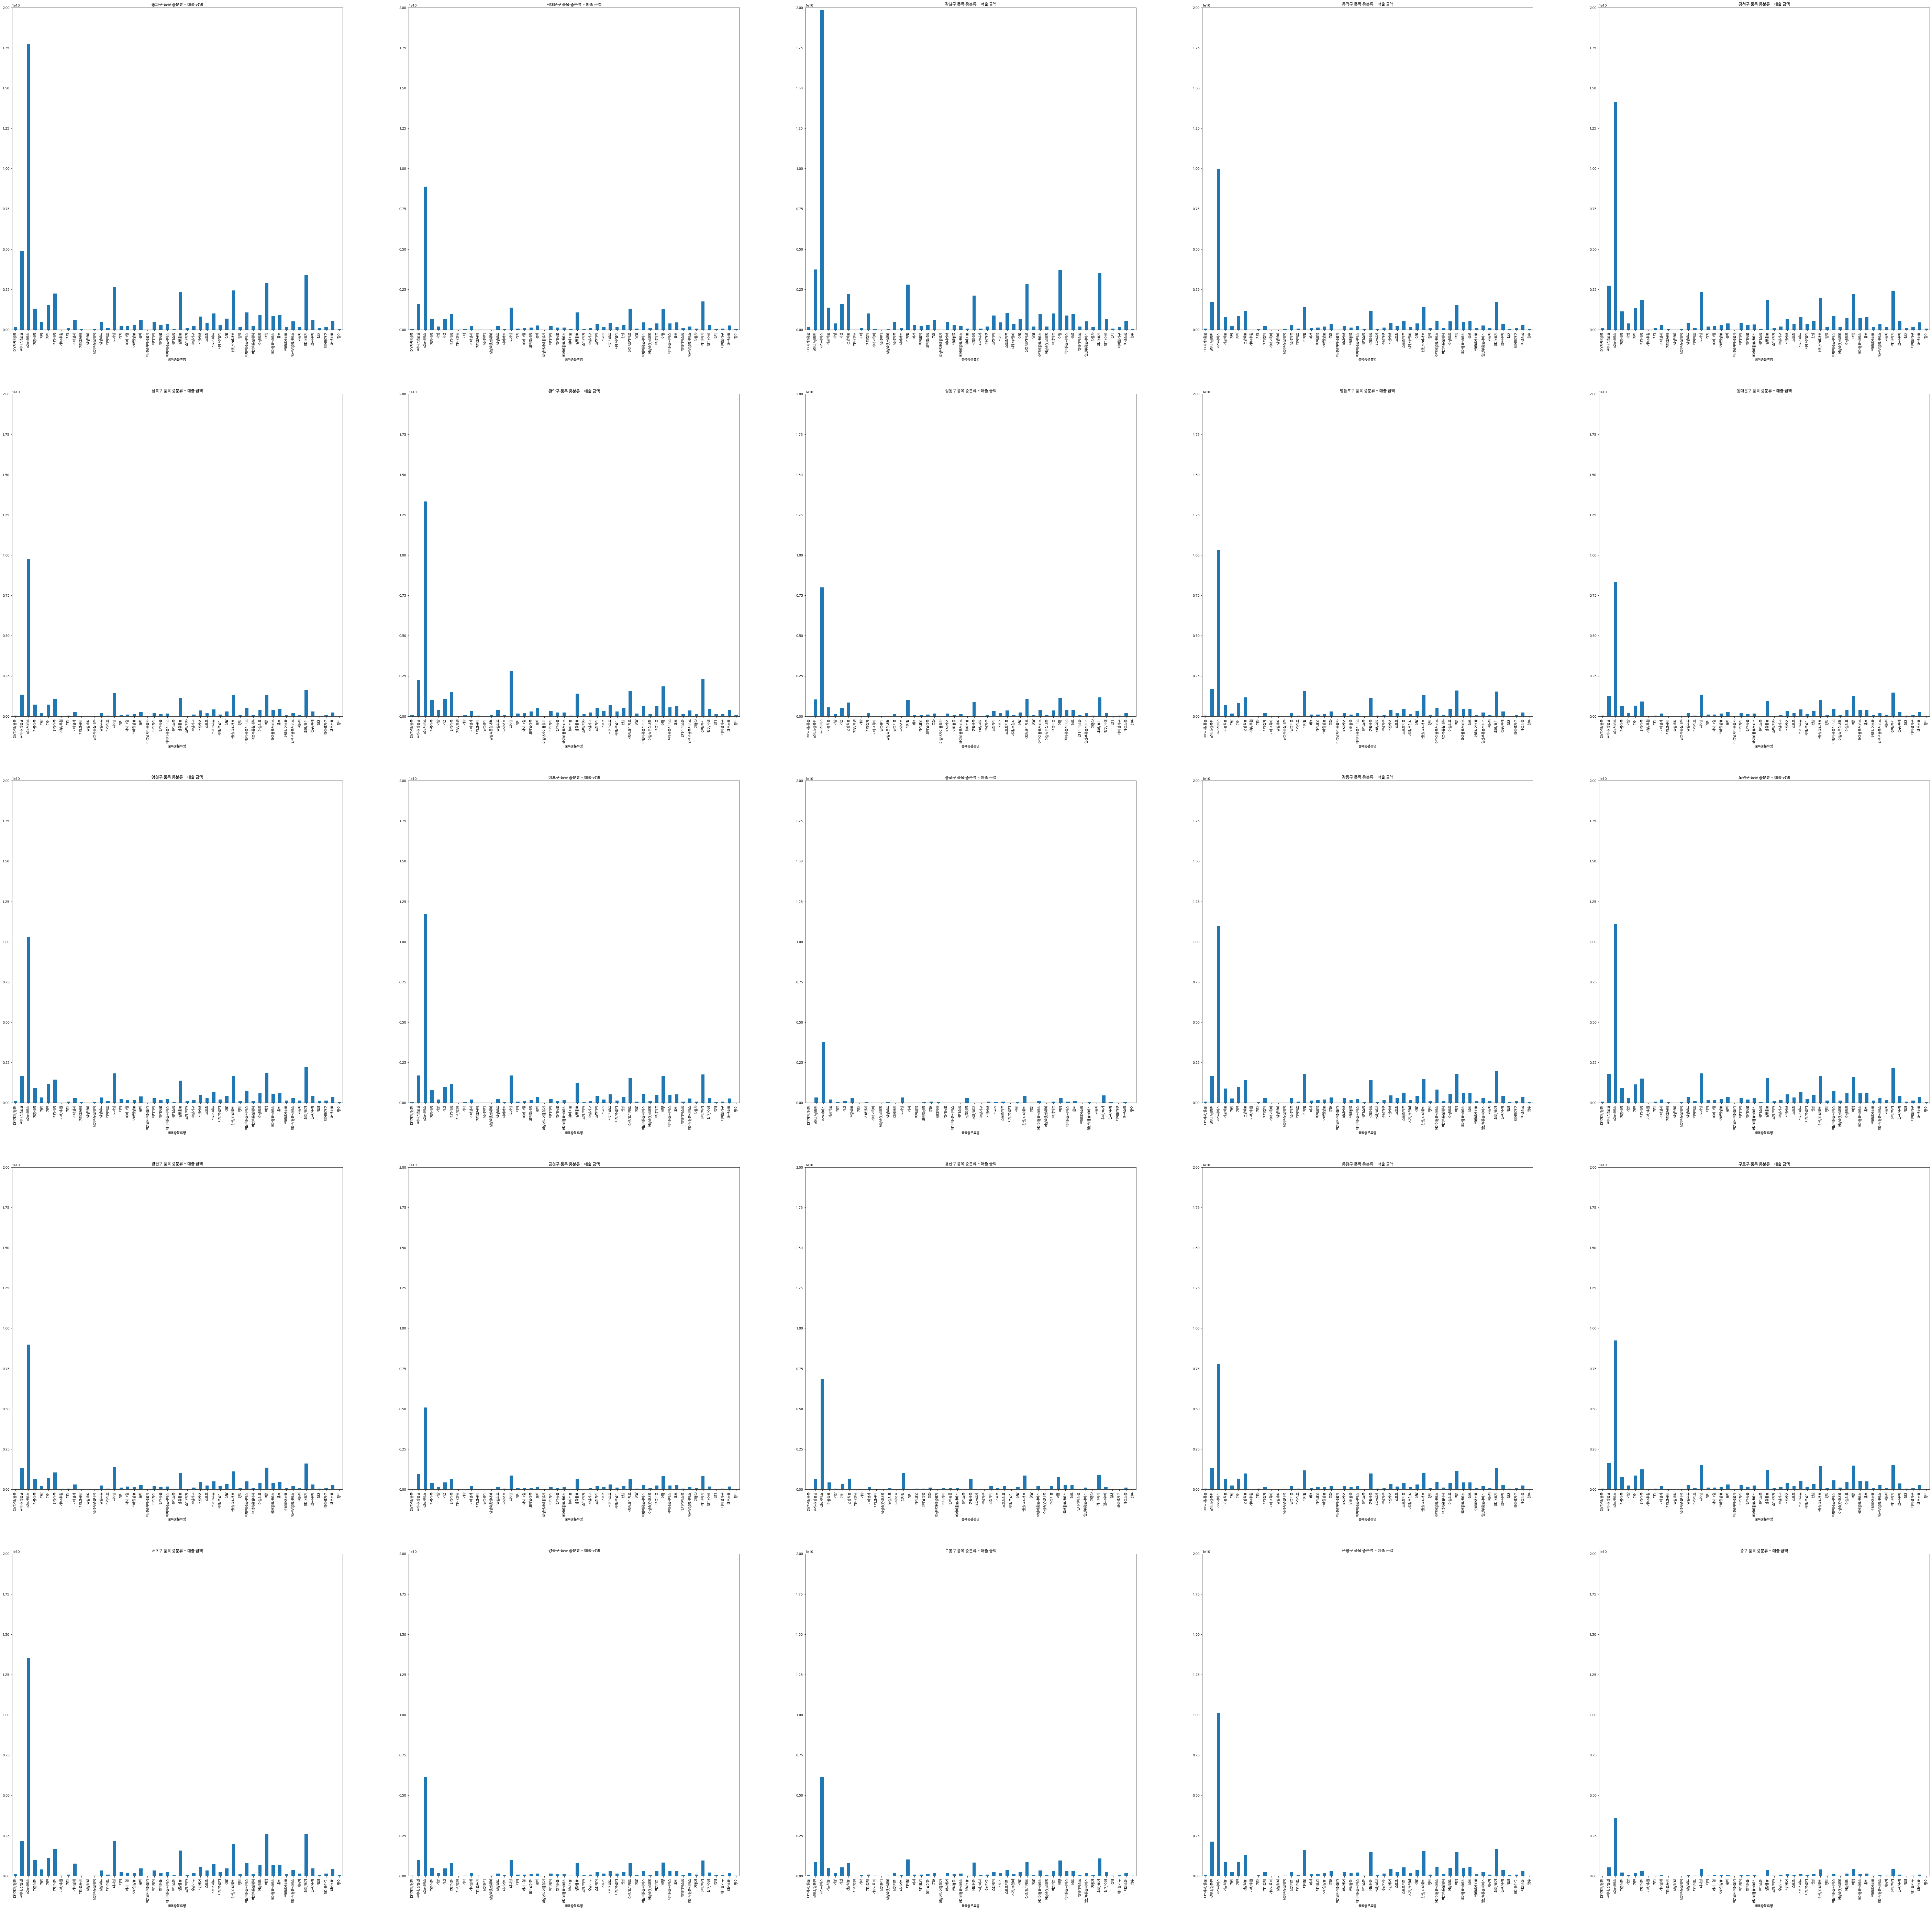

In [22]:
# 지역별 중품목 분류 - 매출 금액

plt.figure(figsize=(100,100))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 20000000000])
    counties[i].groupby('품목중분류명')['매출금액'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류 - 매출 금액')

plt.show()

고객소재지_시군구
강남구     180830
강동구     119513
강북구      69154
강서구     162268
관악구     159774
광진구      99202
구로구     109509
금천구      62560
노원구     129783
도봉구      69470
동대문구     90758
동작구     108694
마포구     113826
서대문구     95897
서초구     121938
성동구      74875
성북구      99671
송파구     187324
양천구     114079
영등포구    105409
용산구      54775
은평구     114971
종로구      28966
중구       32371
중랑구      92965
Name: 매출건수, dtype: int64


<AxesSubplot:xlabel='고객소재지_시군구'>

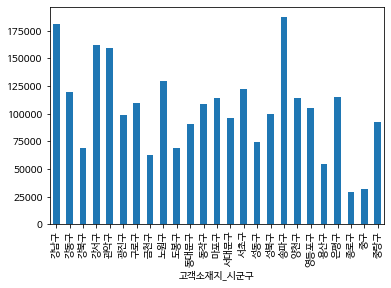

In [23]:
df_1909_매출건수합 = df_1909.groupby('고객소재지_시군구')['매출건수'].sum()
print(df_1909_매출건수합)
df_1909_매출건수합.plot.bar()

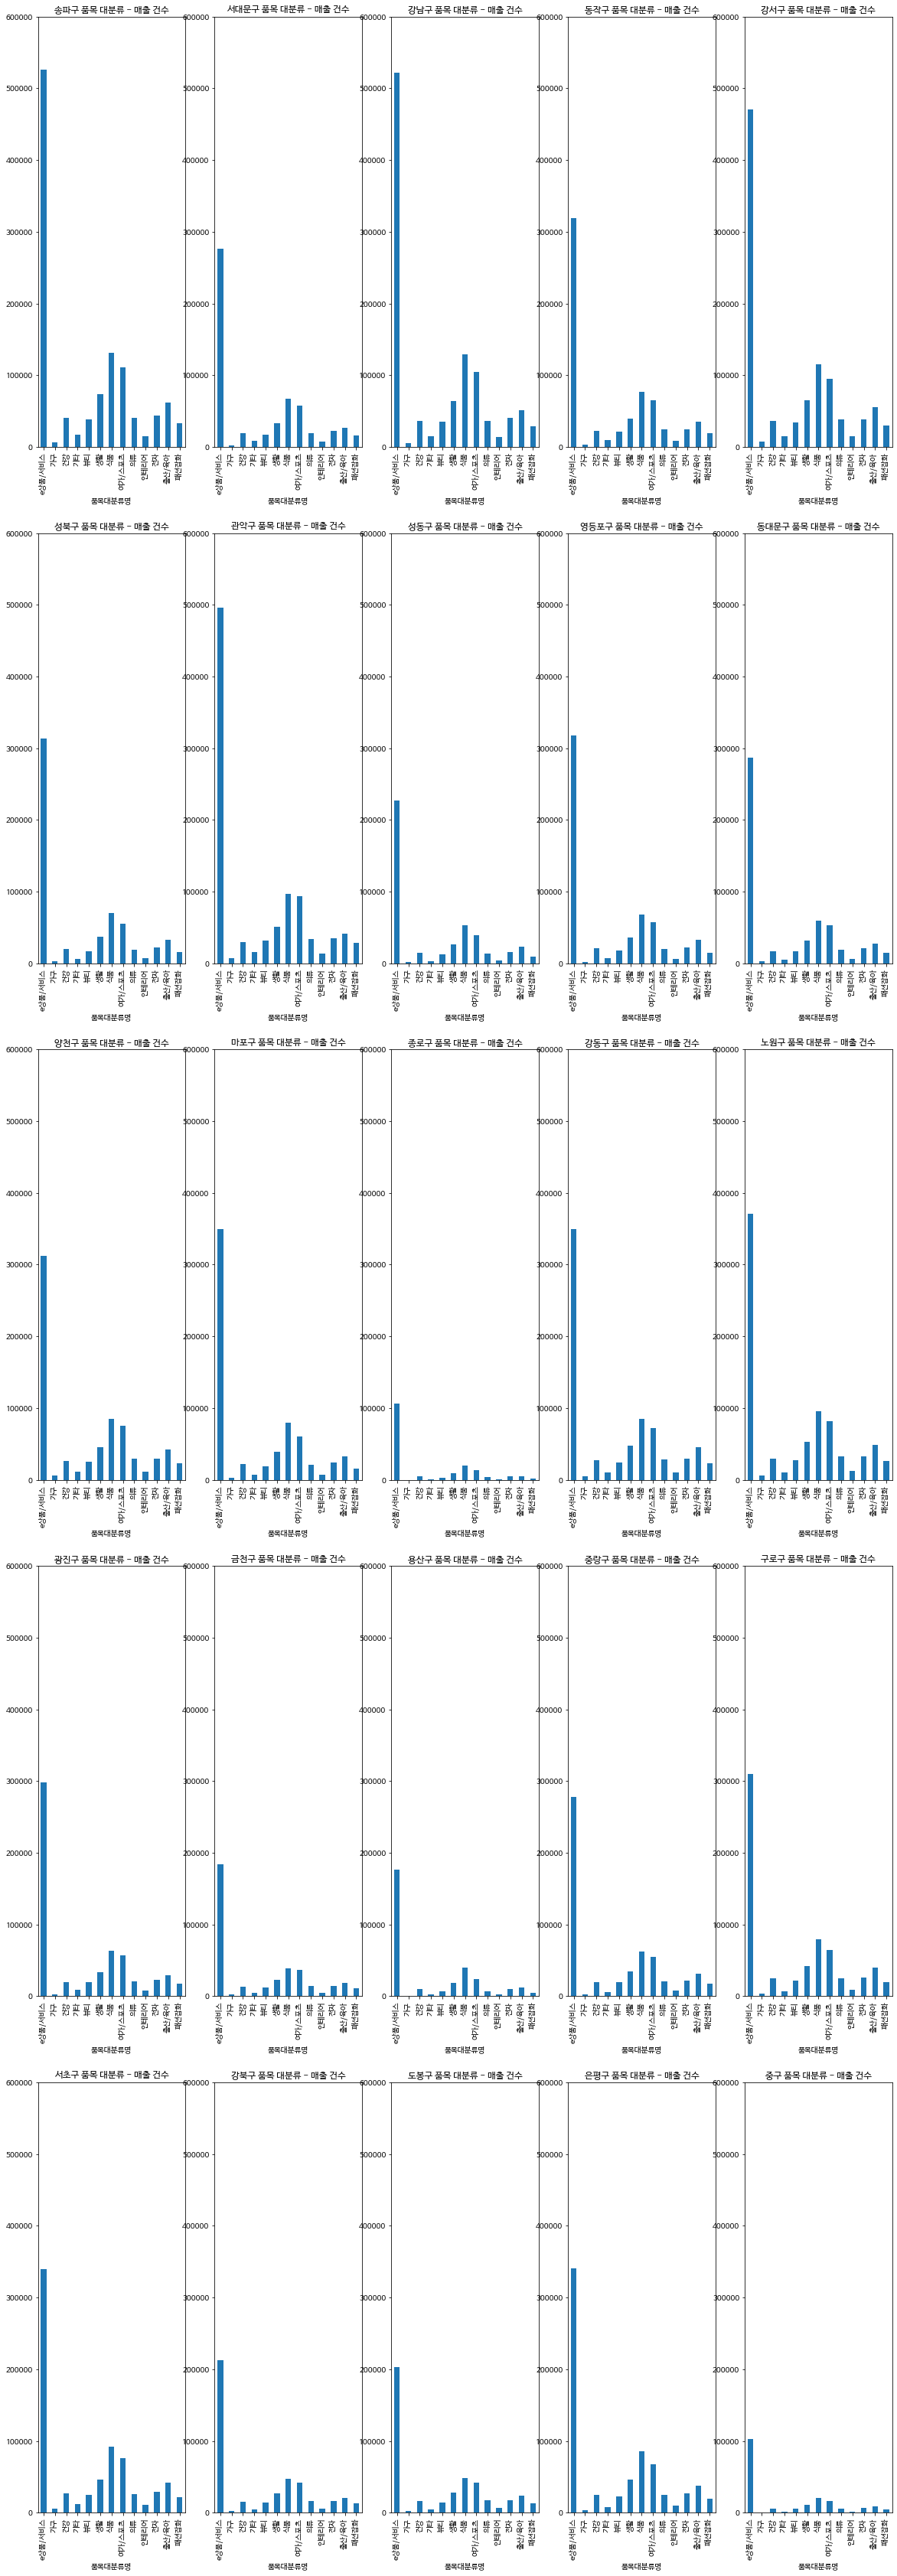

In [24]:
# 지역별 대품목 분류 - 매출 건수

plt.figure(figsize=(20,60))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 600000])
    counties[i].groupby('품목대분류명')['매출건수'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 대분류 - 매출 건수')

plt.show()

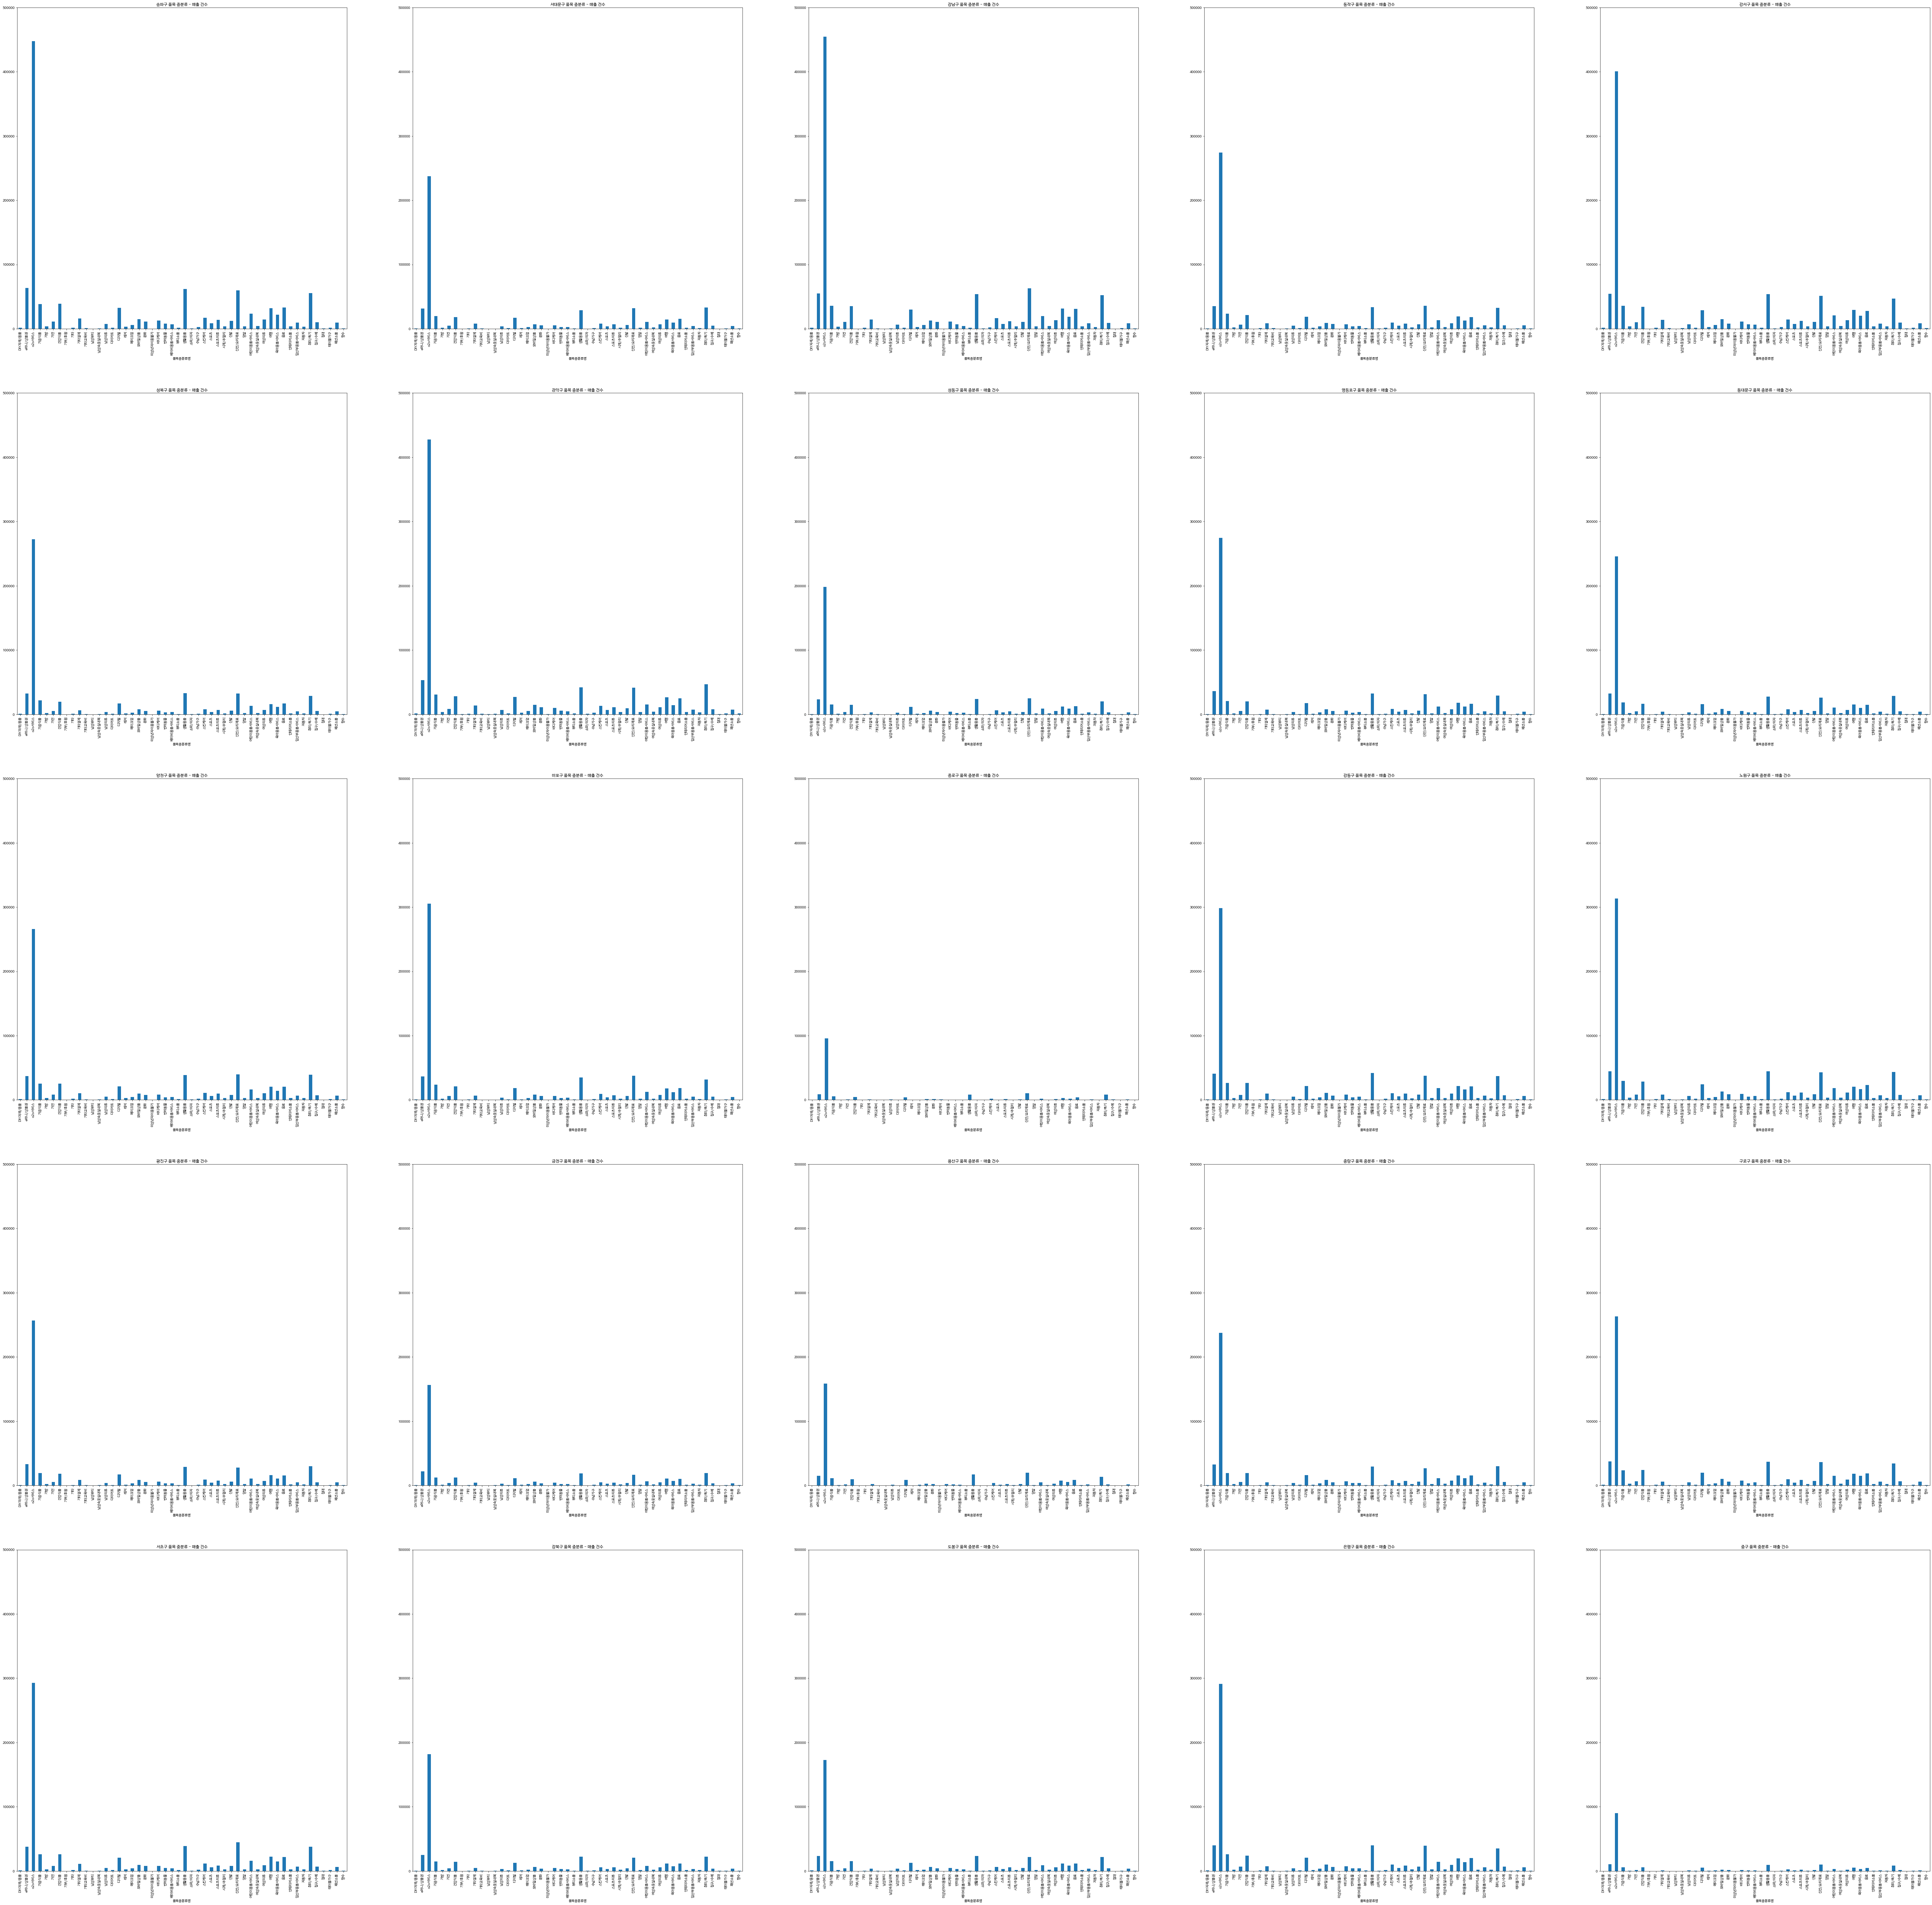

In [25]:
# 지역별 중품목 분류 - 매출 건수

plt.figure(figsize=(100,100))
for i in range(len(sigoongu)):
    plt.subplot(5, 5, i+1)
    plt.ylim([0, 500000])
    counties[i].groupby('품목중분류명')['매출건수'].sum().plot.bar()
    plt.title(sigoongu[i]+ ' 품목 중분류 - 매출 건수')

plt.show()